## ***Mobile Device Usage and User Behavior Dataset***

### Descrição das colunas
    User ID: Unique identifier for each user.
    Device Model: Model of the user's smartphone.
    Operating System: The OS of the device (iOS or Android).
    App Usage Time: Daily time spent on mobile applications, measured in minutes.
    Screen On Time: Average hours per day the screen is active.
    Battery Drain: Daily battery consumption in mAh.
    Number of Apps Installed: Total apps available on the device.
    Data Usage: Daily mobile data consumption in megabytes.
    Age: Age of the user.
    Gender: Gender of the user (Male or Female).
    User Behavior Class: Classification of user behavior based on usage patterns (1 to 5).


##### Importação das bibliotecas e Leitura do dataset

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


##### Verficação dos tipos de dados de cada coluna
###### Aqui, podemos ver o nome e ordem de todas as colunas e também se alguma dessas colunas possui tipo de dado incoerente.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


##### Estatísticas das colunas numéricas
###### São elas: contagem, média, desvio padrão, mínimo e máximo, primeiro, segundo e terceiro quartil.

In [44]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


##### Verificação de ocorrência de dados nulos

In [45]:
df.isna().any()

User ID                       False
Device Model                  False
Operating System              False
App Usage Time (min/day)      False
Screen On Time (hours/day)    False
Battery Drain (mAh/day)       False
Number of Apps Installed      False
Data Usage (MB/day)           False
Age                           False
Gender                        False
User Behavior Class           False
dtype: bool

Não há dados nulos em nenhuma das colunas

##### Remoção de colunas que não serão usadas na nossa análise
###### São elas: User ID e User Behavior Class

In [46]:
df = df.drop(["User ID", "User Behavior Class"], axis=1)
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female


##### Sistemas operacionais que estão presentes no dataset e suas respectivas frequências absolutas

In [47]:
group_operating_system = df.groupby('Operating System').size() # quantidade de valores de cada sistema operacional
group_operating_system

Operating System
Android    554
iOS        146
dtype: int64

Aqui vemos que o sistema operacional que mais aparece é Android

##### Modelos de aparelho que estão presentes no dataset e suas respectivas frequências absolutas

In [48]:
group_device_model= df.groupby('Device Model').size() # quantidade de valores de cada modelo de celular
group_device_model

Device Model
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Xiaomi Mi 11          146
iPhone 12             146
dtype: int64

Podemos observar que os aparelhos mais frequentes são:  Xiaomi Mi 11 e iPhone 12

##### Histograma da distribuição do tempo de tela

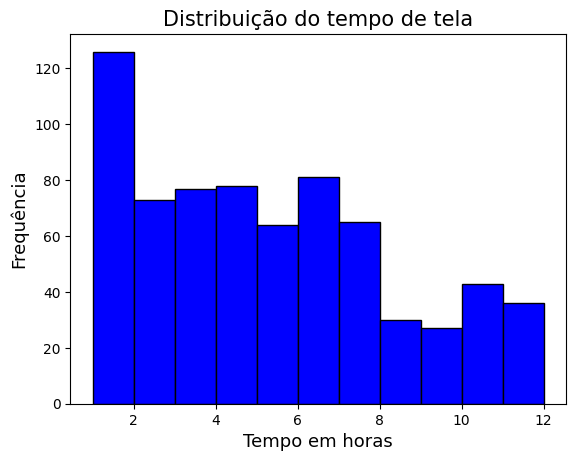

In [49]:
screem_on_time= df['Screen On Time (hours/day)']
plt.hist(screem_on_time, bins=11, color='blue', edgecolor='black')

plt.title('Distribuição do tempo de tela',fontsize=15)
plt.xlabel('Tempo em horas',fontsize=13)
plt.ylabel('Frequência',fontsize=13)

plt.show()

Esse histograma mostra a distribuição do tempo de tela. No eixo x estão os intervalos em horas e no eixo y está a frequência absoluta. Nele vemos que a maior parte das pessoas usam seus aparelhos por um período relativamente moderado (entre 2 e 6 horas por dia), enquanto poucos têm uso extremo (acima de 10 horas).

##### Gráficos de barras

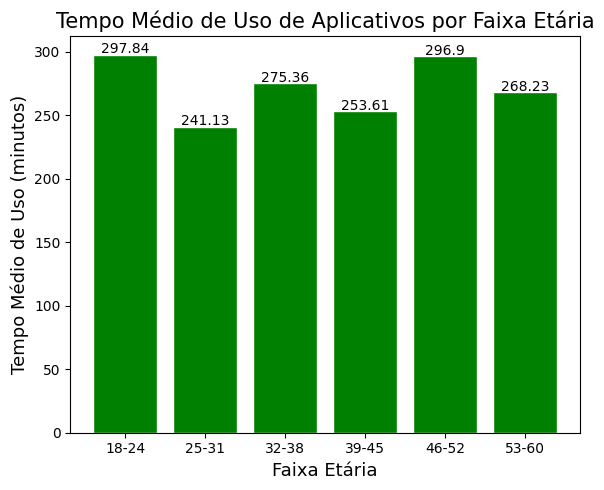

In [50]:
# Gráfico de Tempo Médio de Uso de Aplicativos por Faixa Etária

# Divisão dos intervalos
intervalos = 6
bins = np.linspace(df['Age'].min()-1, df['Age'].max()+1, intervalos + 1)
labels=[]
for i in range(len(bins) - 1):
    labels.append(f'{int(bins[i])+1}-{int(bins[i + 1])}')
    
df['Faixa Etária'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
#cut serve para categorizar as idades de acordo com a faixa etária

media_tempo_uso = df.groupby('Faixa Etária', observed=False)['App Usage Time (min/day)'].mean().reset_index()  
#reset_index foz com que o agrupamento fique em formato de DataFrame com as colunas 'Faixa Etária' e 'App Usage Time (min/day)'

faixas_etarias = media_tempo_uso['Faixa Etária']
tempos_medios = media_tempo_uso['App Usage Time (min/day)']

fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.bar(faixas_etarias, tempos_medios, color= 'green',edgecolor='white')

# arredondar o valor das barras
for bar in bars:
    height = round(bar.get_height(),2)
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height()+1 ,              
        f'{height}',                        
        ha='center',                        
        fontsize=10                         
    )

plt.title('Tempo Médio de Uso de Aplicativos por Faixa Etária', fontsize=15)
plt.xlabel('Faixa Etária',fontsize=13)
plt.ylabel('Tempo Médio de Uso (minutos)',fontsize=13)


#tight_layout faz com que nada fique sobreposto
plt.tight_layout()
plt.show()



Aqui vemos as idades que mais passam tempo usando aplicativos, são elas: entre 18 e 24 anos e entre 46 e 52 anos.

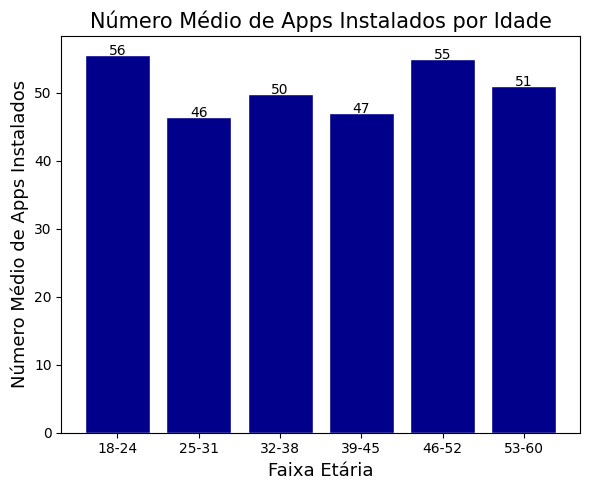

In [51]:
# Gráfico de Número Médio de Apps Instalados por Idade

media_tempo_uso = df.groupby('Faixa Etária', observed=False)['Number of Apps Installed'].mean().reset_index()  

apps_intalados = media_tempo_uso['Number of Apps Installed']

fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.bar(faixas_etarias, apps_intalados, color= 'darkblue',edgecolor='white')

# arredondar a legenda
for bar in bars:
    height = round(bar.get_height())
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(),              
        f'{height}',                        
        ha='center',                        
        fontsize=10                         
    )


plt.title('Número Médio de Apps Instalados por Idade', fontsize=15)
plt.xlabel('Faixa Etária',fontsize=13)
plt.ylabel('Número Médio de Apps Instalados',fontsize=13)


#tight_layout faz com que nada fique sobreposto
plt.tight_layout()
plt.show()


Aqui vemos que as pessoas que mais tem aplicativos nos seus dispositivos estão na faixa etária de 18 a 24 anos e de 46 a 52 anos

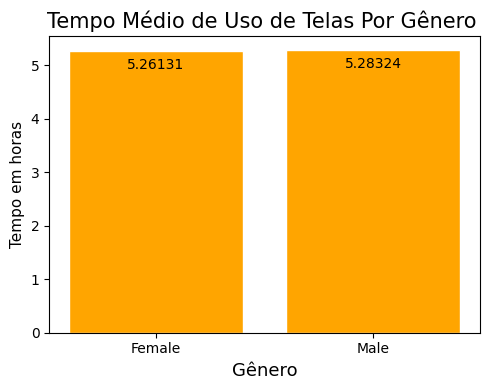

In [52]:
# Gráfico de Tempo Médio de Uso de Telas Por Gênero

media_tempo_uso_gender = df.groupby('Gender')['Screen On Time (hours/day)'].mean().reset_index()  

generos = media_tempo_uso_gender['Gender']
tempo_medio_tela = media_tempo_uso_gender['Screen On Time (hours/day)']

fig, ax = plt.subplots(figsize=(5, 4))
bars = ax.bar(generos, tempo_medio_tela, color='orange', edgecolor='white')

ax.bar_label(bars, fontsize=10,padding=-15)

plt.title('Tempo Médio de Uso de Telas Por Gênero ', fontsize=15)
plt.ylabel('Tempo em horas',fontsize=11)
plt.xlabel('Gênero',fontsize=13)

plt.tight_layout()
plt.show()

Nesse gráfico, podemos observar que quase não há diferença entre o tempo que os homens passam usando telas e o tempo que as mulheres passam usando telas.

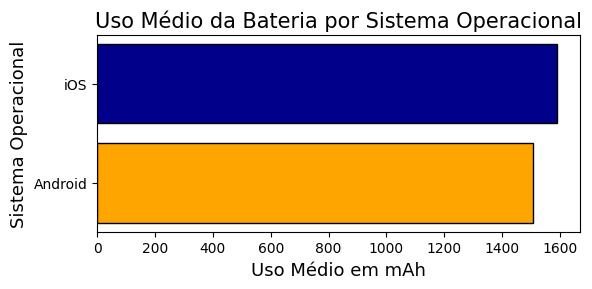

In [53]:
# Gráfico do Uso Médio da Bateria por Sistema Operacional
media_uso_bateria_SO = df.groupby('Operating System')['Battery Drain (mAh/day)'].mean().reset_index()  

sistema = media_uso_bateria_SO['Operating System']
uso_bateria_SO = media_uso_bateria_SO['Battery Drain (mAh/day)']

plt.figure(figsize=(6, 3))
plt.barh(sistema, uso_bateria_SO, color=['orange','darkblue'], edgecolor='black')

plt.title('Uso Médio da Bateria por Sistema Operacional', fontsize=15)
plt.ylabel('Sistema Operacional',fontsize=13)
plt.xlabel('Uso Médio em mAh',fontsize=13)


#tight_layout faz com que nada fique sobreposto
plt.tight_layout()
plt.show()

Esse gráfico mostra que dispositivos que possuem o sistema operacional iOS, em média, gastam mais bateria do que dispositivos que utilizam Android.

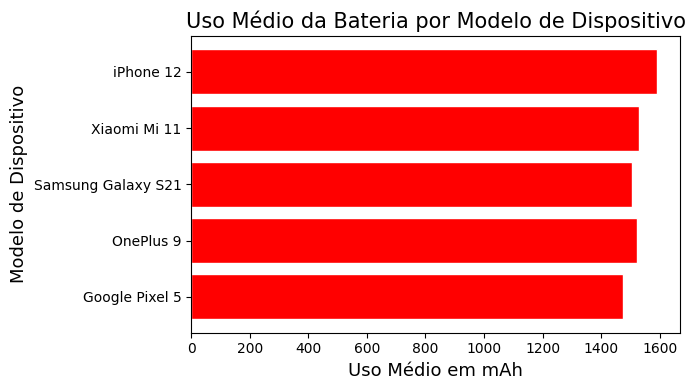

In [54]:
# Gráfico do Uso Médio da Bateria por Modelo de Dispositivo
media_uso_bateria = df.groupby('Device Model')['Battery Drain (mAh/day)'].mean().reset_index()  

modelos = media_uso_bateria['Device Model']
uso_bateria = media_uso_bateria['Battery Drain (mAh/day)']

plt.figure(figsize=(7, 4))
plt.barh(modelos, uso_bateria, color='red', edgecolor='white')

plt.title('Uso Médio da Bateria por Modelo de Dispositivo', fontsize=15)
plt.ylabel('Modelo de Dispositivo',fontsize=13)
plt.xlabel('Uso Médio em mAh',fontsize=13)


#tight_layout faz com que nada fique sobreposto
plt.tight_layout()
plt.show()

Como já havíamos visto, dispositivos que usam iOS gastam mais bateria do que os que usam Android. Esse gráfico de barras horizontais, nos mostra que o único dispositivo no nosso dataframe, que utiliza iOS (iPhone 12) é o que mais gasta bateria.

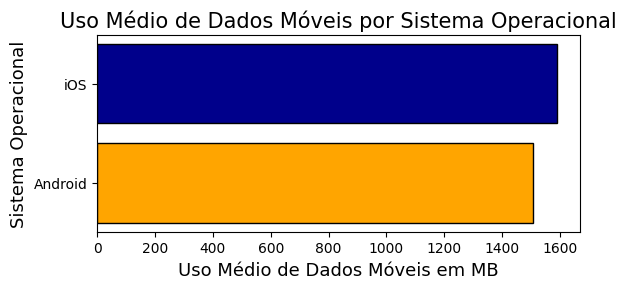

In [55]:
# Gráfico do Uso Médio de Dados Móveis por Sistema Operacional
media_uso_dados_SO = df.groupby('Operating System')['Data Usage (MB/day)'].mean().reset_index()  

sistema_dados = media_uso_dados_SO['Operating System']
uso_dados_SO = media_uso_dados_SO['Data Usage (MB/day)']

plt.figure(figsize=(6, 3))
plt.barh(sistema_dados, uso_bateria_SO, color=['orange','darkblue'], edgecolor='black')

plt.title('Uso Médio de Dados Móveis por Sistema Operacional', fontsize=15)
plt.ylabel('Sistema Operacional',fontsize=13)
plt.xlabel('Uso Médio de Dados Móveis em MB',fontsize=13)


#tight_layout faz com que nada fique sobreposto
plt.tight_layout()
plt.show()

Esse gráfico mostra que dispositivos que possuem o sistema operacional iOS, em média, usam mais Dados Móveis do que dispositivos que utilizam Android.

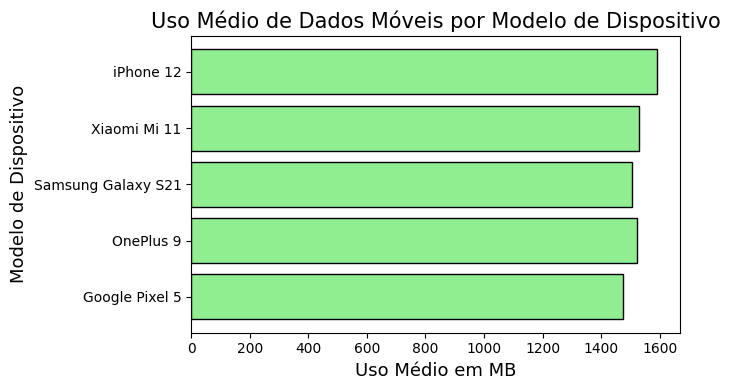

In [56]:
# Gráfico do Uso Médio de Dados Móveis por Modelo de Dispositivo
media_uso_bateria = df.groupby('Device Model')['Data Usage (MB/day)'].mean().reset_index()  

modelos = media_uso_bateria['Device Model']
uso_dados = media_uso_bateria['Data Usage (MB/day)']

plt.figure(figsize=(7, 4))
plt.barh(modelos, uso_bateria, color='lightgreen', edgecolor='black')

plt.title('Uso Médio de Dados Móveis por Modelo de Dispositivo', fontsize=15)
plt.ylabel('Modelo de Dispositivo',fontsize=13)
plt.xlabel('Uso Médio em MB',fontsize=13)


plt.tight_layout()
plt.show()

Como foi dito, anteriormente dispositivos que possuem o sistema operacional iOS, em média, usam mais Dados Móveis do que dispositivos que utilizam Android. Isso pode ser comprovado acima, no gráfico de barras horizontais, pois ele mostra que o único dispositivo no nosso dataframe, que utiliza iOS (iPhone 12) é o que mais gasta Dados Móveis.

##### Correlações

Vamos descobrir como algumas variáveis se relacionam! Aqui, serão calculadas as correlações entre: o tempo de uso de aplicativos e o tempo que a tela fica ligada, o consumo de bateria e o número de apps instalados, e, por último, o consumo de bateria e o uso de dados móveis. O resultado vai nos dizer se elas têm alguma associação forte (positiva ou negativa) ou se são mais independentes.

In [57]:
correlacaoAppScreen = df['App Usage Time (min/day)'].corr(df['Screen On Time (hours/day)'])  # Correlação direta
correlacaoBatteryApps = df['Battery Drain (mAh/day)'].corr(df['Number of Apps Installed'])
correlacaoBatteryData = df['Battery Drain (mAh/day)'].corr(df['Data Usage (MB/day)'])

print(f"Correlação entre App Usage Time e Screen On Time: {correlacaoAppScreen:.2f}")
print(f"Correlação entre Battery Drain e Number of Apps Installed: {correlacaoBatteryApps:.2f}")
print(f"Correlação entre Battery Drain e Data Usage: {correlacaoBatteryData:.2f}")

Correlação entre App Usage Time e Screen On Time: 0.95
Correlação entre Battery Drain e Number of Apps Installed: 0.96
Correlação entre Battery Drain e Data Usage: 0.93


Vemos que todas as correlações são positivas e muito próximas a 1, o que significa que as variáveis possuem uma forte relação linear e direta. Ou seja, em cada caso, ambas crescem juntas.

##### Regressão Linear

Plotaremos os gráficos de dispersão (consumo de bateria x número de apps instalados e consumo de bateria x uso de dados móveis) juntamente com a reta de regressão, que minimiza a distância entre todos os pontos observados.

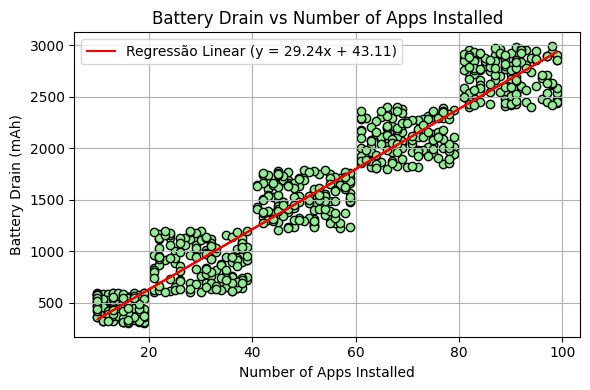

In [58]:
# Battery Drain x Number of Apps Installed

x= df['Number of Apps Installed']
y= df['Battery Drain (mAh/day)']
m, b = np.polyfit(x, y, 1)  # 1 indica uma regressão linear

plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='lightgreen', edgecolor='black')
plt.plot(x, m * x + b, color='red', label=f'Regressão Linear (y = {m:.2f}x + {b:.2f})')
plt.title('Battery Drain vs Number of Apps Installed')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Battery Drain (mAh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

É possível perceber que quanto maior o número de aplicativos instalados, maior será o uso da bateria.

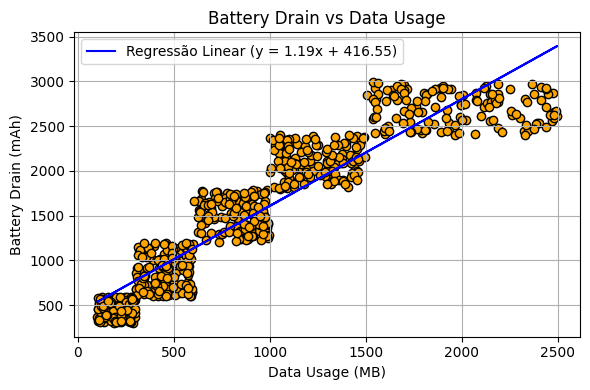

In [59]:
# Battery Drain x Data Usage

x=df['Data Usage (MB/day)']
y= df['Battery Drain (mAh/day)']

m, b = np.polyfit(x, y, 1)  

plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='orange', edgecolor='black')
plt.plot(x, m * x + b, color='blue', label=f'Regressão Linear (y = {m:.2f}x + {b:.2f})')

plt.title('Battery Drain vs Data Usage')
plt.xlabel('Data Usage (MB)')
plt.ylabel('Battery Drain (mAh)')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

Aqui também é de fácil visualização que quanto maior for o uso de dados móveis, maior será o gasto da bateria.